In [23]:
import numpy as np
import file_tool as ft
from scipy.stats import linregress
import scipy.constants as C
import matplotlib.pyplot as plt
import pandas as pd
import math

'''
csv中数据存放形式
波长	589.001	589.608
上能级能量(单位 ev)	13.36619	13.36619 
跃迁几率*简并度	246000000	123000000
'''

path = r'C:\Users\0\Desktop\temper\plasma.csv'
spec_path = r'C:\Users\0\Desktop\temper\49.csv'
#read data
wl,all_spec = ft.Load_MultiSpec(spec_path)
data = pd.read_csv(path,header=None,sep = ',').iloc[:,1:3].values


In [24]:
i = 0
spec = all_spec[:,i]
#creat sub_data
lambda_k,E_k,Ag_k = data[0,:],data[1,:],data[2,:]
I_k = spec[np.isin(wl,lambda_k)]
y = [math.log(I*lam/ag,math.e) for lam,I,ag in zip(lambda_k,I_k,Ag_k)]
#########plot###########

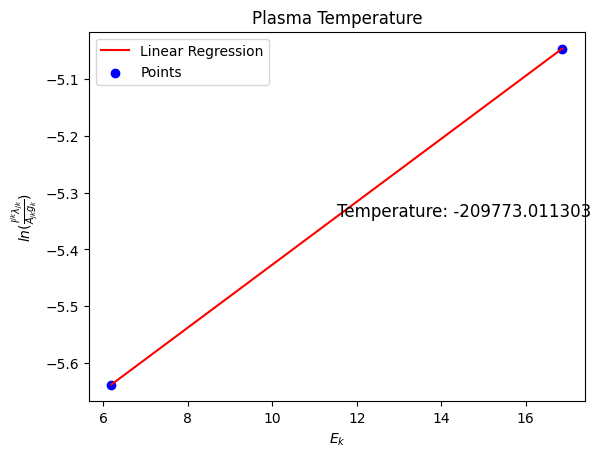

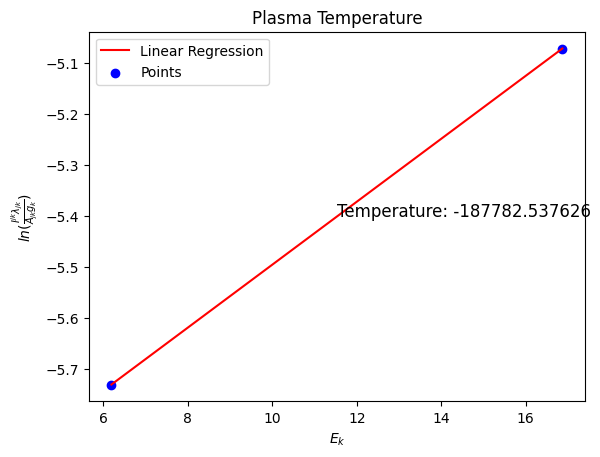

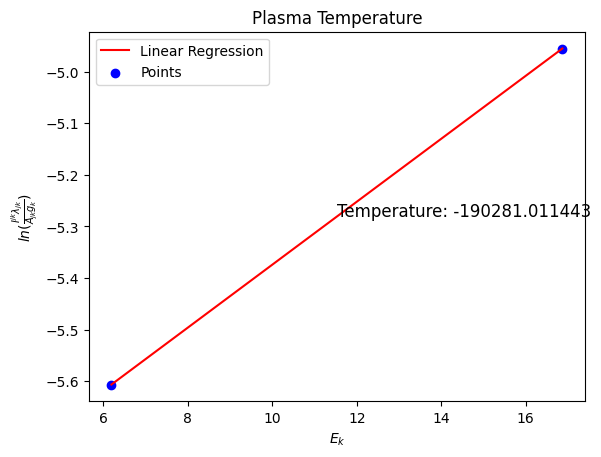

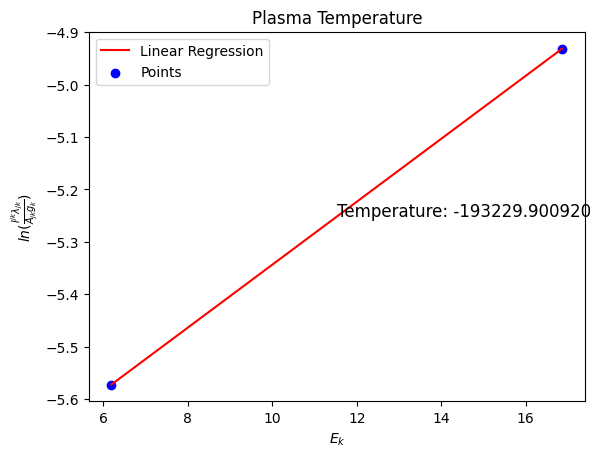

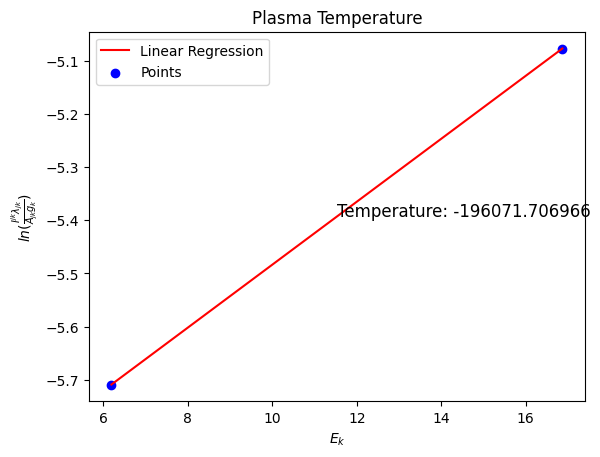

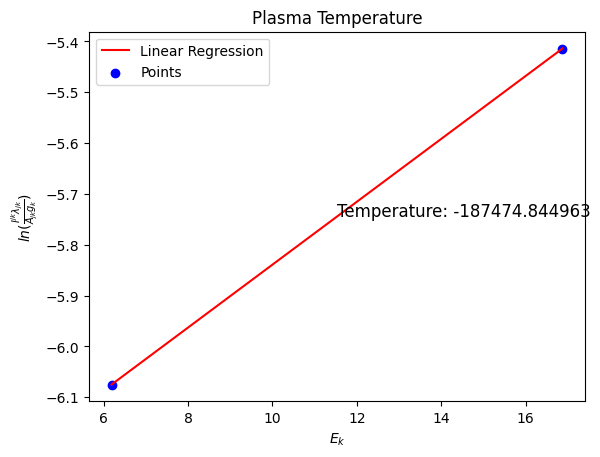

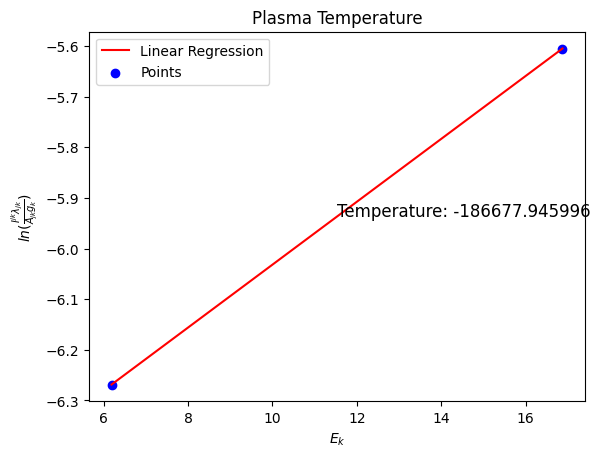

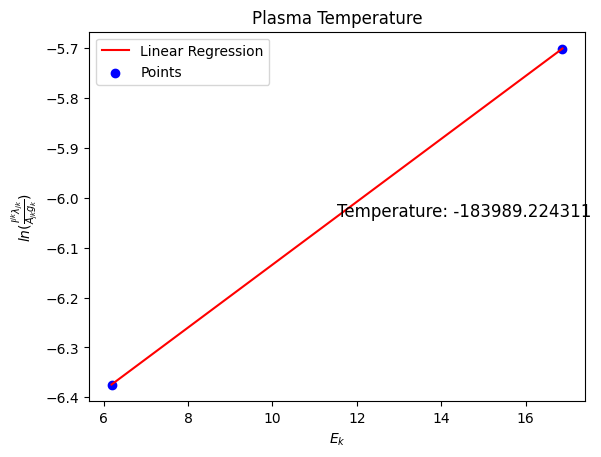

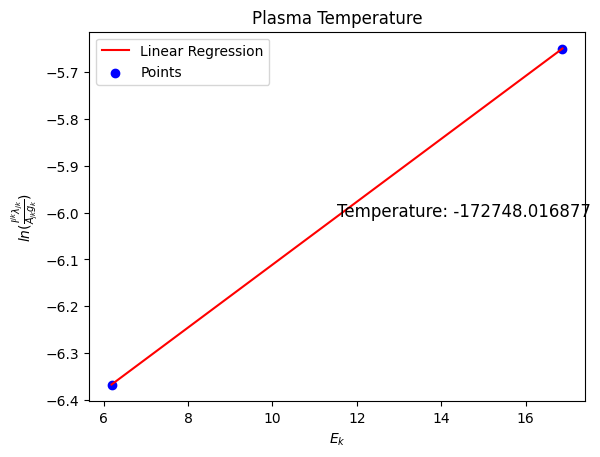

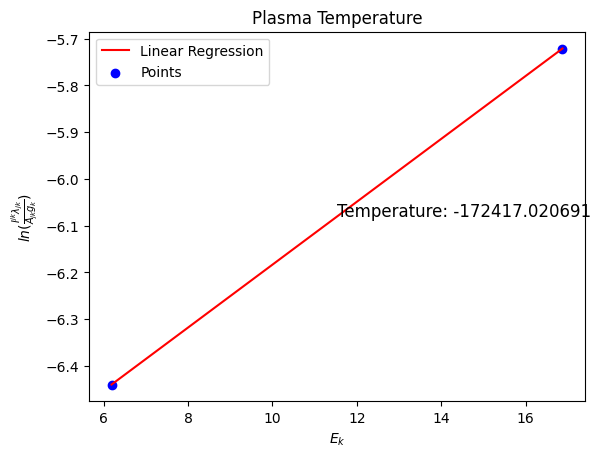

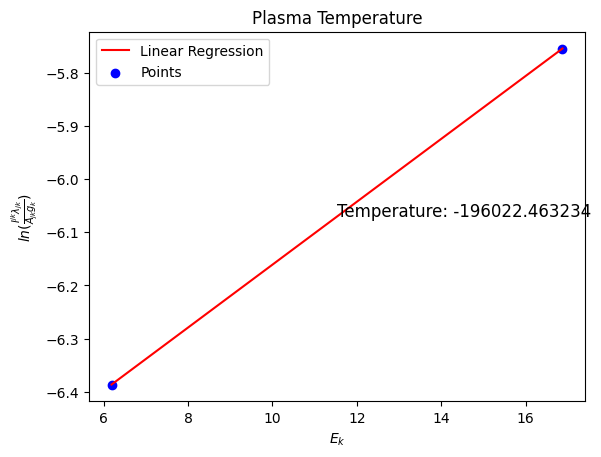

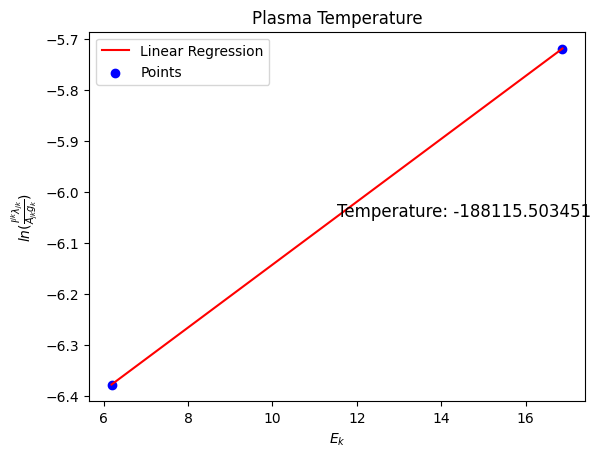

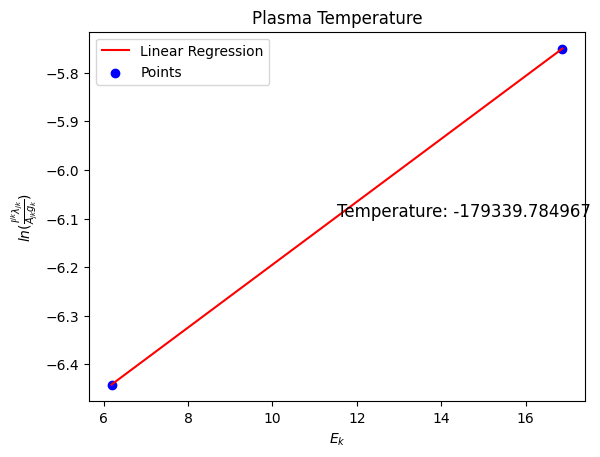

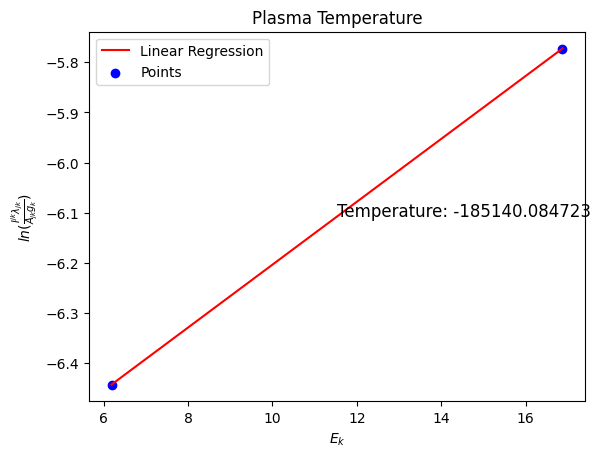

In [25]:
all_temp = []
temp_x = []
for i in range(len(all_spec[0,:])):
    spec = all_spec[:,i]
    #creat sub_data
    lambda_k,E_k,Ag_k = data[0,:],data[1,:],data[2,:]
    I_k = spec[np.isin(wl,lambda_k)]
    y = [math.log(I*lam/ag,math.e) for lam,I,ag in zip(lambda_k,I_k,Ag_k)]

    #########plot###########
    #linear regression
    slope, intercept, r_value, p_value, std_err = linregress(E_k, y)
    line = slope * np.array(E_k) + intercept
    Temperature = - C.e / (slope * C.Boltzmann)
    all_temp.append(Temperature)
    temp_x.append(i)
    # Plotting the regression line
    plt.plot(E_k, line, color='red', label='Linear Regression')
    plt.scatter(E_k, y, color='blue', label='Points')
    plt.text(E_k.mean(),np.mean(y),f'Temperature: {Temperature:.6f}', fontsize=12, color='black')

    # Adding labels and title to the plot
    plt.xlabel('$E_k$')
    plt.ylabel(r'$ln(\frac {I^{jk}\lambda_{jk}}{A_{jk}g_k})$')


    plt.title('Plasma Temperature')

    # Adding legend
    plt.legend()

    # Displaying the plot
    plt.show()

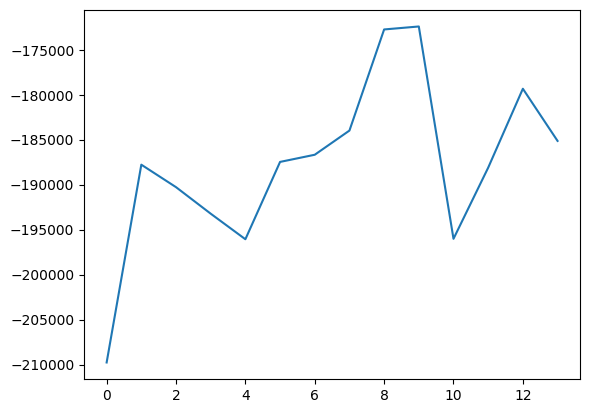

In [26]:
plt.plot(temp_x,all_temp)